In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [116]:
data = pd.read_csv('titanic.csv', encoding='Latin-1', usecols=['Survived','Pclass', 'Sex', 'Age', 'Fare'])

In [117]:
data.inplace=True
data

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
882,0,2,male,27.0,13.0000
883,1,1,female,19.0,30.0000
884,0,3,female,7.0,23.4500
885,1,1,male,26.0,30.0000


In [120]:
train, test = train_test_split(data, test_size=0.1)
len(train.index), len(test.index)

(798, 89)

In [121]:
from collections import Counter as ctr

prob_ty = ctr(train.Survived)
prob_tot = len(train)

In [122]:
prob_ty[0],prob_ty[1]

(490, 308)

In [123]:
def Es(T):
    return prob_ty[T] / prob_tot

In [124]:
Es(0)

0.6140350877192983

In [125]:
Es(1)

0.38596491228070173

In [126]:
prob_ty = ctr(train.Pclass)
prob_tot = len(train)

def Ep(T):
    return prob_ty[T] / prob_tot

Ep(1),Ep(2),Ep(3)

(0.23934837092731828, 0.21303258145363407, 0.5476190476190477)

In [127]:
prob_ty = ctr(train.Sex)
prob_tot = len(train)

def Ew(T):
    return prob_ty[T] / prob_tot

Ew('male'),Ew('female')

(0.6441102756892231, 0.3558897243107769)

In [128]:
train['Age'].describe()

count    798.000000
mean      29.375739
std       14.236361
min        0.420000
25%       20.000000
50%       28.000000
75%       37.750000
max       80.000000
Name: Age, dtype: float64

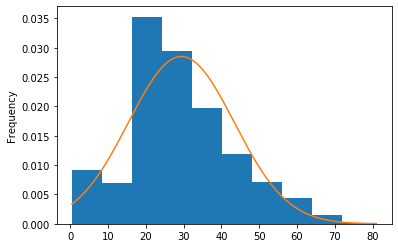

In [107]:
from scipy.stats import norm

train['Age'].plot(kind='hist', normed=True)
r = np.arange(0.42,81, 0.001)
plt.plot(r, norm.pdf(r,29.391,14.003))

In [108]:
train['Fare'].describe()

count    798.000000
mean      32.763449
std       51.242722
min        0.000000
25%        7.903100
50%       14.454200
75%       31.359375
max      512.329200
Name: Fare, dtype: float64

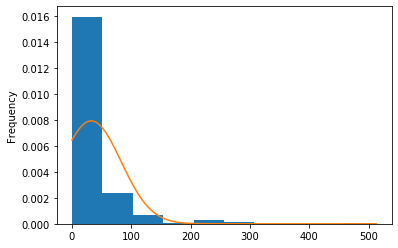

In [109]:
from scipy.stats import norm

train['Fare'].plot(kind='hist', normed=True)
r = np.arange(0.00,513, 0.001)
plt.plot(r, norm.pdf(r,32.465,50.336))

In [165]:
target = data.Survived
inputs = data.drop('Survived',axis='columns')
sex_updated = pd.get_dummies(inputs.Sex)

inputs=pd.concat([inputs,sex_updated],axis='columns')

inputs.drop('Sex', axis='columns',inplace=True)

In [132]:
len(inputs)

887

In [133]:
inputs['Age'].isnull().sum()

0

In [134]:
inputs['Pclass'].isnull().sum()

0

In [135]:
inputs['Fare'].isnull().sum()

0

In [136]:
XTrain, XTest, YTrain, YTest = train_test_split(inputs, target, test_size=0.2, random_state=1)


In [158]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(XTrain,YTrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [160]:
model.score(XTest,YTest)

0.7752808988764045